In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('../../../ao3_data/tfidf_merged_chs_full_20210915/')

In [2]:
all_tfidf_df = None
# loop through every file in current directory
# and concatenate each data frame into all_tfidf_df

for file in os.listdir():
    if file.endswith('.tsv'):
        tfidf_df = pd.read_csv(file, sep='\t')
        if all_tfidf_df is None:
            all_tfidf_df = tfidf_df
        else:
            all_tfidf_df = pd.concat([all_tfidf_df, tfidf_df], ignore_index=True)

In [3]:
os.chdir('../lda_merged_chs_20210915/')

In [4]:
all_lda_df = None

# loop through every file in current directory
# and concatenate each data frame into all_lda_df

for file in os.listdir():
    if file.endswith('.tsv'):
        lda_df = pd.read_csv(file, sep='\t')
        if all_lda_df is None:
            all_lda_df = lda_df
        else:
            all_lda_df = pd.concat([all_lda_df, lda_df], ignore_index=True)
            
# print the mean of the JSD values
# all_lda_df['JSD'].median()
all_lda_df.head()
# print(os.getcwd())

,index,AdditionalTags,ArchiveWarnings,Author,Bookmarks,Category,Chapters,Characters,Fandoms,Hits,...,Relationship,Title,Words,PublishDate,UpdateDate,CompleteDate,Comments,URL,Dist,JSD
0,53,AU,Creator Chose Not To Use Archive Warnings,writerchick0214,45,M/M,5,"Daryl Dixon, Rick Grimes",['Walking Dead (TV)'],5392.0,...,Daryl Dixon/Rick Grimes,Hot For Teacher,13512.0,2012-06-02,2012-11-15,NaN,41,http://archiveofourown.org/works/420395/chapte...,"[0.093486205, 1.2372419e-06, 1.2372419e-06, 0....",0.285329
1,191,"Abduction, Kink Meme, Whump, allusions to rape...",Graphic Depictions Of Violence,The_Readers_Muse,19,Gen,29,Daryl Dixon,['Walking Dead (TV)'],4514.0,...,NaN,Sanctuary for All,65330.0,2012-06-03,2012-10-22,NaN,13,http://archiveofourown.org/works/422017/chapte...,"[0.26083198, 3.0743297e-07, 3.0743297e-07, 0.0...",0.214739
2,952,"Alternate Universe, Walking Dead \'Fic Exchang...",Creator Chose Not To Use Archive Warnings,Never_Says_Die,18,M/M,2,"Daryl Dixon, Glenn, Ensemble, Original Characters","['Walking Dead', 'Walking Dead (TV)']",1875.0,...,Daryl Dixon/Glenn,"Oh, Death",4198.0,2012-06-08,2012-06-08,NaN,13,http://archiveofourown.org/works/428499/chapte...,"[0.34782645, 4.701467e-06, 4.701467e-06, 4.701...",0.292114
3,1690,"Child Abuse, Brothers, Pre-Canon",Creator Chose Not To Use Archive Warnings,rivalmagician,6,Gen,1,"Merle Dixon, Daryl Dixon","['Walking Dead (TV)', 'Walking Dead']",1190.0,...,NaN,Fives Times Merle was Nice to his Little Brother,1549.0,2012-06-09,NaN,2012-06-09,5,http://archiveofourown.org/works/429424,"[1.15784305e-05, 1.15784305e-05, 1.15784305e-0...",0.574360
4,1852,Community: tamingthemuse,No Archive Warnings Apply,Severina,1,NaN,1,"Lori Grimes, Shane Walsh, Dale Horwath, Andrea...",['Walking Dead (TV)'],233.0,...,NaN,All That Remains,1829.0,2012-06-10,NaN,2012-06-10,0,http://archiveofourown.org/works/430211,"[0.8034444, 9.115732e-06, 9.115732e-06, 0.1452...",0.271417


In [5]:
os.chdir('../../ao3/exps/20230203_kudos_to_hits_kdes')

In [6]:
def remove_0_and_nan_values(df, novelty):
    # remove 0 and  nan values
    df.dropna(subset=[novelty, 'Kudos', 'Hits'],inplace=True)
    df = df[df[novelty] != 0]
    df = df[df['Kudos'] != 0]
    df = df[df['Hits'] != 0]
    return df

645959
161489 161490


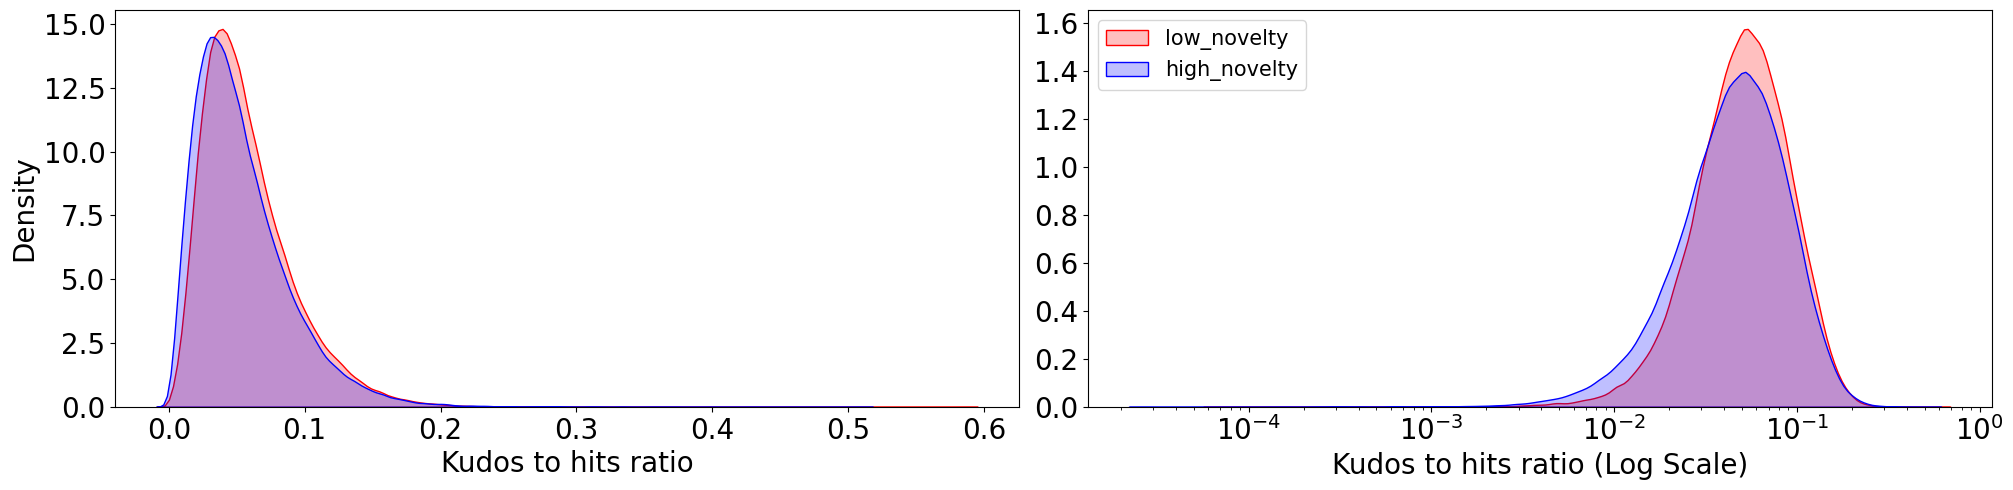

In [7]:
# Same plots as above for term frequency, but low and high novelty
# are categorized by bottom 25% and top 25% of Cos values

temp_for_viz_df = all_tfidf_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'Cos')

# sort by Cos values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['Cos'])

# loop over all rows in temp_for_viz_df, add a column for novelty_category
# also create a column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(20, 5))
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')

ax[0].set_xlabel('Kudos to hits ratio', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
# change xtick label size
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
# plt.legend()
plt.legend(loc = 'upper left', fontsize=15)
plt.xlabel(xlabel="Kudos to hits ratio (Log Scale)",fontsize=20)
plt.ylabel(ylabel="", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig('kudos_hits_ratio_kde_plot_term_novelty_top_bottom_25p_full.pdf')

645959
161489 161490


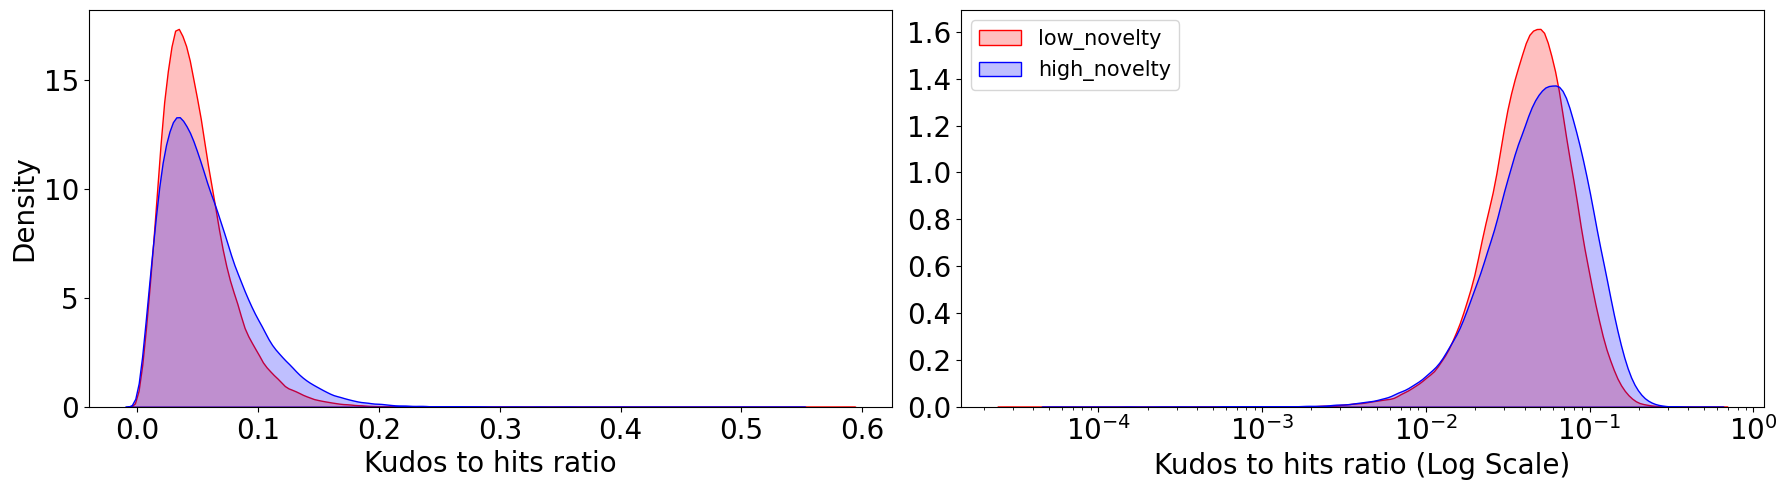

In [8]:
# Same plots as above for topic novelty, but low and high novelty
# are categorized by bottom 25% and top 25% of JSD values

temp_for_viz_df = all_lda_df.copy()

temp_for_viz_df = remove_0_and_nan_values(temp_for_viz_df, 'JSD')

# sort by JSD values
temp_for_viz_df = temp_for_viz_df.sort_values(by=['JSD'])

# loop over all rows in temp_for_viz_df, add a
# column for Kudos/Hits ratio
for index, row in temp_for_viz_df.iterrows():
    temp_for_viz_df.loc[index, 'kudos_hits_ratio'] = row['Kudos'] / row['Hits']
    
# assign low to bottom 25% and high to top 25%
low = temp_for_viz_df.iloc[:int(len(temp_for_viz_df)/4)]
high = temp_for_viz_df.iloc[int(len(temp_for_viz_df)*3/4):]

print(len(temp_for_viz_df))
print(len(low), len(high))

fig, ax = plt.subplots(1,2, figsize=(18, 5))
# plt.tight_layout()
# plt.title('Kudos/Hits Ratio KDE Plot')
sns.kdeplot(low['kudos_hits_ratio'], ax=ax[0], color='red', shade=True, label='low_novelty')
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[0], color='blue', shade=True, label='high_novelty')
ax[0].set_xlabel('Kudos to hits ratio', fontsize=20)
ax[0].set_ylabel('Density', fontsize=20)
# change xtick label size
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis='y', labelsize=20)

sns.kdeplot(low['kudos_hits_ratio'], ax=ax[1], color='red', shade=True, label='low_novelty', log_scale=True)
sns.kdeplot(high['kudos_hits_ratio'], ax=ax[1], color='blue', shade=True, label='high_novelty', log_scale=True)
plt.legend(loc = 'upper left', fontsize=15)
plt.xlabel(xlabel="Kudos to hits ratio (Log Scale)",fontsize=20)
plt.ylabel(ylabel="", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig('kudos_hits_ratio_kde_plot_topic_novelty_top_bottom_25p_full.pdf')